# 06. jhanvi831/Software-Engineer-Salary-Prediction

## Predictions with ML Regression Models | Series 2 (T3) - survey_results_public.csv

In [1]:
import numpy as np
import pandas as pd 
import matplotlib.pyplot as plt 
import seaborn as sns
import warnings
import time
warnings.filterwarnings('ignore')
from sklearn.linear_model import LinearRegression, Lasso, Ridge, QuantileRegressor
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor, GradientBoostingRegressor
from sklearn.neighbors import KNeighborsRegressor
from sklearn.svm import SVR
from sklearn.neural_network import MLPRegressor
import xgboost
from sklearn.model_selection import train_test_split, cross_val_score, cross_validate
from sklearn.preprocessing import OneHotEncoder, LabelEncoder, PolynomialFeatures, StandardScaler, MinMaxScaler
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score, get_scorer_names
df = pd.read_csv('06_survey_results_public.csv')

In [2]:
# First 5 rows of the dataset
df.head()

,ResponseId,MainBranch,Employment,Country,US_State,UK_Country,EdLevel,Age1stCode,LearnCode,YearsCode,...,Age,Gender,Trans,Sexuality,Ethnicity,Accessibility,MentalHealth,SurveyLength,SurveyEase,ConvertedCompYearly
0,1,I am a developer by profession,"Independent contractor, freelancer, or self-em...",Slovakia,NaN,NaN,"Secondary school (e.g. American high school, G...",18 - 24 years,Coding Bootcamp;Other online resources (ex: vi...,NaN,...,25-34 years old,Man,No,Straight / Heterosexual,White or of European descent,None of the above,None of the above,Appropriate in length,Easy,62268.0
1,2,I am a student who is learning to code,"Student, full-time",Netherlands,NaN,NaN,"Bachelor’s degree (B.A., B.S., B.Eng., etc.)",11 - 17 years,"Other online resources (ex: videos, blogs, etc...",7,...,18-24 years old,Man,No,Straight / Heterosexual,White or of European descent,None of the above,None of the above,Appropriate in length,Easy,NaN
2,3,"I am not primarily a developer, but I write co...","Student, full-time",Russian Federation,NaN,NaN,"Bachelor’s degree (B.A., B.S., B.Eng., etc.)",11 - 17 years,"Other online resources (ex: videos, blogs, etc...",NaN,...,18-24 years old,Man,No,Prefer not to say,Prefer not to say,None of the above,None of the above,Appropriate in length,Easy,NaN
3,4,I am a developer by profession,Employed full-time,Austria,NaN,NaN,"Master’s degree (M.A., M.S., M.Eng., MBA, etc.)",11 - 17 years,NaN,NaN,...,35-44 years old,Man,No,Straight / Heterosexual,White or of European descent,I am deaf / hard of hearing,NaN,Appropriate in length,Neither easy nor difficult,NaN
4,5,I am a developer by profession,"Independent contractor, freelancer, or self-em...",United Kingdom of Great Britain and Northern I...,NaN,England,"Master’s degree (M.A., M.S., M.Eng., MBA, etc.)",5 - 10 years,Friend or family member,17,...,25-34 years old,Man,No,NaN,White or of European descent,None of the above,NaN,Appropriate in length,Easy,NaN


In [3]:
# Last 5 rows of the dataset
df.tail()

,ResponseId,MainBranch,Employment,Country,US_State,UK_Country,EdLevel,Age1stCode,LearnCode,YearsCode,...,Age,Gender,Trans,Sexuality,Ethnicity,Accessibility,MentalHealth,SurveyLength,SurveyEase,ConvertedCompYearly
83434,83435,I am a developer by profession,Employed full-time,United States of America,Texas,NaN,"Bachelor’s degree (B.A., B.S., B.Eng., etc.)",11 - 17 years,"Other online resources (ex: videos, blogs, etc...",6,...,25-34 years old,Man,No,Straight / Heterosexual,White or of European descent,None of the above,I have a concentration and/or memory disorder ...,Appropriate in length,Easy,160500.0
83435,83436,I am a developer by profession,"Independent contractor, freelancer, or self-em...",Benin,NaN,NaN,"Bachelor’s degree (B.A., B.S., B.Eng., etc.)",11 - 17 years,"Other online resources (ex: videos, blogs, etc...",4,...,18-24 years old,Man,No,Straight / Heterosexual,Black or of African descent,None of the above,None of the above,Appropriate in length,Easy,3960.0
83436,83437,I am a developer by profession,Employed full-time,United States of America,New Jersey,NaN,"Secondary school (e.g. American high school, G...",11 - 17 years,School,10,...,25-34 years old,Man,No,NaN,White or of European descent,None of the above,None of the above,Appropriate in length,Neither easy nor difficult,90000.0
83437,83438,I am a developer by profession,Employed full-time,Canada,NaN,NaN,"Bachelor’s degree (B.A., B.S., B.Eng., etc.)",11 - 17 years,Online Courses or Certification;Books / Physic...,5,...,25-34 years old,Man,No,Straight / Heterosexual,White or of European descent,None of the above,I have a mood or emotional disorder (e.g. depr...,Appropriate in length,Neither easy nor difficult,816816.0
83438,83439,I am a developer by profession,Employed full-time,Brazil,NaN,NaN,"Professional degree (JD, MD, etc.)",11 - 17 years,School,14,...,18-24 years old,Man,No,Straight / Heterosexual,Hispanic or Latino/a/x,None of the above,None of the above,Appropriate in length,Easy,21168.0


In [4]:
# All available columns, their counts and data types
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 83439 entries, 0 to 83438
Data columns (total 48 columns):
 #   Column                        Non-Null Count  Dtype  
---  ------                        --------------  -----  
 0   ResponseId                    83439 non-null  int64  
 1   MainBranch                    83439 non-null  object 
 2   Employment                    83323 non-null  object 
 3   Country                       83439 non-null  object 
 4   US_State                      14920 non-null  object 
 5   UK_Country                    4418 non-null   object 
 6   EdLevel                       83126 non-null  object 
 7   Age1stCode                    83243 non-null  object 
 8   LearnCode                     82963 non-null  object 
 9   YearsCode                     81641 non-null  object 
 10  YearsCodePro                  61216 non-null  object 
 11  DevType                       66484 non-null  object 
 12  OrgSize                       60726 non-null  object 
 13  C

## Preprocessing

All preprocessing steps were carried out in almost exactly the same way as the author.

In [5]:
# Take only the meaningful columns:
# country, education level, years of coding as professional, employment type & converted comp. yearly
df_sub = df[["Country", "EdLevel", "YearsCodePro", "Employment", "ConvertedCompYearly"]]
# ConvertedCompYearly will be renamed to Salary
df_sub = df_sub.rename({"ConvertedCompYearly": "Salary"}, axis=1)
print("DATASET SHAPE:", df_sub.shape)
df_sub.head(10)

DATASET SHAPE: (83439, 5)


,Country,EdLevel,YearsCodePro,Employment,Salary
0,Slovakia,"Secondary school (e.g. American high school, G...",NaN,"Independent contractor, freelancer, or self-em...",62268.0
1,Netherlands,"Bachelor’s degree (B.A., B.S., B.Eng., etc.)",NaN,"Student, full-time",NaN
2,Russian Federation,"Bachelor’s degree (B.A., B.S., B.Eng., etc.)",NaN,"Student, full-time",NaN
3,Austria,"Master’s degree (M.A., M.S., M.Eng., MBA, etc.)",NaN,Employed full-time,NaN
4,United Kingdom of Great Britain and Northern I...,"Master’s degree (M.A., M.S., M.Eng., MBA, etc.)",10,"Independent contractor, freelancer, or self-em...",NaN
5,United States of America,"Bachelor’s degree (B.A., B.S., B.Eng., etc.)",NaN,"Student, part-time",NaN
6,United States of America,"Secondary school (e.g. American high school, G...",NaN,I prefer not to say,NaN
7,Malaysia,"Bachelor’s degree (B.A., B.S., B.Eng., etc.)",NaN,"Student, full-time",NaN
8,India,"Bachelor’s degree (B.A., B.S., B.Eng., etc.)",4,Employed part-time,NaN
9,Sweden,"Master’s degree (M.A., M.S., M.Eng., MBA, etc.)",4,Employed full-time,51552.0


In [6]:
# Rows with null salaries will be removed
df_sub = df_sub[df_sub['Salary'].notnull()]
print("DATASET SHAPE AFTER REMOVAL OF NULL SALARIES:", df_sub.shape)
df_sub.head(10)

DATASET SHAPE AFTER REMOVAL OF NULL SALARIES: (46844, 5)


,Country,EdLevel,YearsCodePro,Employment,Salary
0,Slovakia,"Secondary school (e.g. American high school, G...",NaN,"Independent contractor, freelancer, or self-em...",62268.0
9,Sweden,"Master’s degree (M.A., M.S., M.Eng., MBA, etc.)",4,Employed full-time,51552.0
11,Spain,"Bachelor’s degree (B.A., B.S., B.Eng., etc.)",5,Employed full-time,46482.0
12,Germany,"Master’s degree (M.A., M.S., M.Eng., MBA, etc.)",6,Employed full-time,77290.0
16,Turkey,"Bachelor’s degree (B.A., B.S., B.Eng., etc.)",2,Employed full-time,17748.0
17,Canada,"Bachelor’s degree (B.A., B.S., B.Eng., etc.)",6,Employed full-time,46135.0
18,Singapore,"Other doctoral degree (Ph.D., Ed.D., etc.)",30,I prefer not to say,160932.0
23,France,"Master’s degree (M.A., M.S., M.Eng., MBA, etc.)",2,Employed full-time,38915.0
24,Germany,"Master’s degree (M.A., M.S., M.Eng., MBA, etc.)",18,Employed full-time,77831.0
26,Switzerland,"Master’s degree (M.A., M.S., M.Eng., MBA, etc.)",5,Employed full-time,81319.0


In [7]:
# Info about the current dataset
df_sub.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 46844 entries, 0 to 83438
Data columns (total 5 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   Country       46844 non-null  object 
 1   EdLevel       46823 non-null  object 
 2   YearsCodePro  46391 non-null  object 
 3   Employment    46831 non-null  object 
 4   Salary        46844 non-null  float64
dtypes: float64(1), object(4)
memory usage: 2.1+ MB


In [8]:
# Then, remove those rows containing null values. There should be no more...
df_sub = df_sub.dropna()
print("DATASET SHAPE AFTER REMOVAL OF ROWS WITH NULL:", df_sub.shape)
df_sub.isnull().sum()

DATASET SHAPE AFTER REMOVAL OF ROWS WITH NULL: (46359, 5)


Country         0
EdLevel         0
YearsCodePro    0
Employment      0
Salary          0
dtype: int64

In [9]:
# Also, select such rows where person was employed as full time
df_sub = df_sub[df_sub["Employment"] == "Employed full-time"]
df_sub = df_sub.drop("Employment", axis=1)
df_sub.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 40211 entries, 9 to 83438
Data columns (total 4 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   Country       40211 non-null  object 
 1   EdLevel       40211 non-null  object 
 2   YearsCodePro  40211 non-null  object 
 3   Salary        40211 non-null  float64
dtypes: float64(1), object(3)
memory usage: 1.5+ MB


In [10]:
# Let's filter the countries such that their counts lower than the cutoff value are moved to 'Other'
def shorten_categories(categories, cutoff):
    categorical_map = {}
    for i in range(len(categories)):
        if categories.values[i] >= cutoff:
            categorical_map[categories.index[i]] = categories.index[i]
        else:
            categorical_map[categories.index[i]] = 'Other'
    return categorical_map

In [11]:
# After that, we have these counts of countries as below
country_map = shorten_categories(df_sub['Country'].value_counts(), 400)
# print(country_map)
print("CURRENT DATASET SHAPE:", df_sub.shape)
df_sub['Country'] = df_sub['Country'].map(country_map)
df_sub['Country'].value_counts()

CURRENT DATASET SHAPE: (40211, 4)


Other                                                   10725
United States of America                                 9175
India                                                    3385
Germany                                                  2753
United Kingdom of Great Britain and Northern Ireland     2604
Canada                                                   1553
France                                                   1396
Brazil                                                   1340
Spain                                                     890
Netherlands                                               835
Australia                                                 825
Poland                                                    775
Italy                                                     756
Russian Federation                                        741
Sweden                                                    735
Turkey                                                    458
Switzerl

In [12]:
# It's better to remove the outliers once and for all!
df_sub = df_sub[df_sub["Salary"] <= 200000]
df_sub = df_sub[df_sub["Salary"] >= 10000]
df_sub = df_sub[df_sub['Country'] != 'Other']  # Even other countries are dropped as well

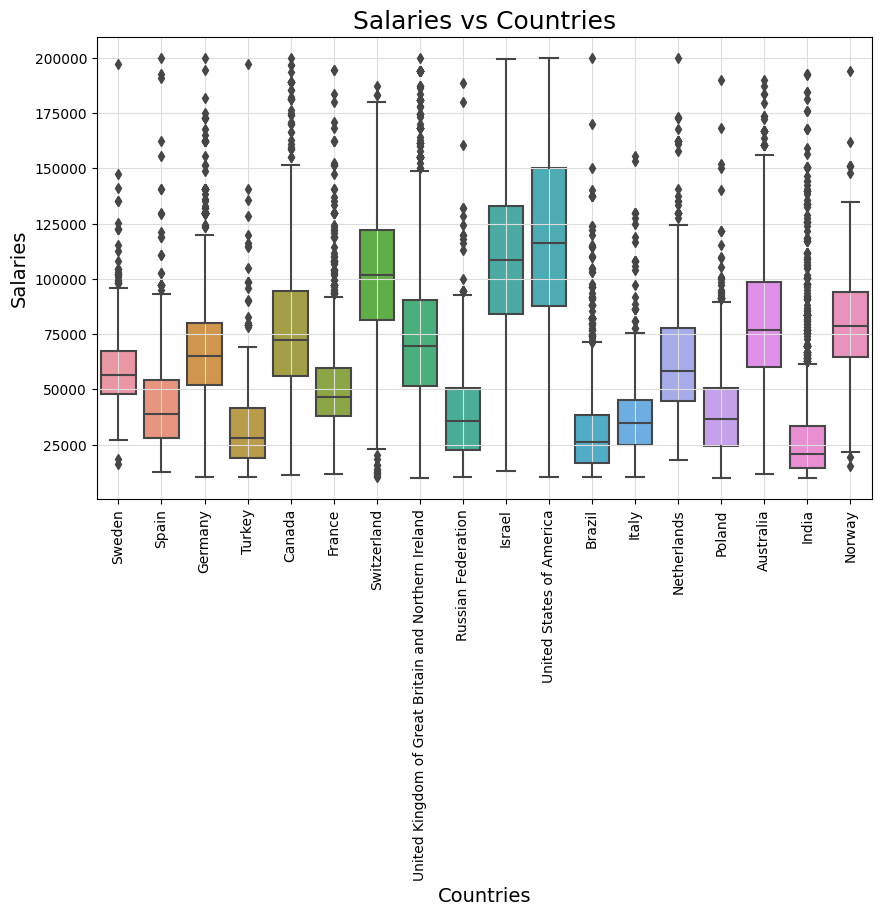

In [13]:
# Box plot visualization: Salaries vs Countries
plt.figure(figsize=(10,6))
sns.boxplot(data=df_sub, x='Country', y='Salary')
plt.title("Salaries vs Countries", fontsize=18)
plt.xlabel('Countries', fontsize=14)
plt.ylabel('Salaries', fontsize=14)
plt.xticks(rotation=90)
plt.grid(color='#dddddd')
plt.show()

In [14]:
print("CURRENT DATASET SHAPE:", df_sub.shape)

CURRENT DATASET SHAPE: (25580, 4)


In [15]:
# Let's check the unique values of 'years of coding as professional' column (note the data type: object)
df_sub["YearsCodePro"].unique()

array(['4', '5', '6', '2', '18', '21', '16', '10', 'Less than 1 year',
       '3', '15', '12', '8', '17', '1', '14', '26', '34', '11', '25',
       '24', '22', '13', '9', '7', '39', '20', '27', '23', '30', '19',
       '35', '33', '43', '40', '29', '38', '31', '42', '28', '46', '32',
       '36', '37', '47', '45', '44', '41', 'More than 50 years', '50',
       '49', '48'], dtype=object)

In [16]:
# It's better to convert the such texts into numbers, so it can be processed appropriately.
def clean_experience(x):
    if x == 'More than 50 years':
        return 50
    if x == 'Less than 1 year':
        return 0.5
    return float(x)
df_sub['YearsCodePro'] = df_sub['YearsCodePro'].apply(clean_experience)

In [17]:
df_sub["YearsCodePro"].unique()

array([ 4. ,  5. ,  6. ,  2. , 18. , 21. , 16. , 10. ,  0.5,  3. , 15. ,
       12. ,  8. , 17. ,  1. , 14. , 26. , 34. , 11. , 25. , 24. , 22. ,
       13. ,  9. ,  7. , 39. , 20. , 27. , 23. , 30. , 19. , 35. , 33. ,
       43. , 40. , 29. , 38. , 31. , 42. , 28. , 46. , 32. , 36. , 37. ,
       47. , 45. , 44. , 41. , 50. , 49. , 48. ])

In [18]:
# How about education levels?
df_sub["EdLevel"].unique()

array(['Master’s degree (M.A., M.S., M.Eng., MBA, etc.)',
       'Bachelor’s degree (B.A., B.S., B.Eng., etc.)',
       'Professional degree (JD, MD, etc.)',
       'Some college/university study without earning a degree',
       'Other doctoral degree (Ph.D., Ed.D., etc.)', 'Something else',
       'Primary/elementary school', 'Associate degree (A.A., A.S., etc.)',
       'Secondary school (e.g. American high school, German Realschule or Gymnasium, etc.)'],
      dtype=object)

In [19]:
# Well, these need to be simplified, thus they can be handled easily
def clean_education(x):
    if 'Bachelor’s degree' in x:
        return 'Bachelor'
    if 'Master’s degree' in x:
        return 'Master'
    if 'Professional degree' in x or 'Other doctoral' in x:
        return 'PostGrad'
    return 'LessThanBachelor'
df_sub['EdLevel'] = df_sub['EdLevel'].apply(clean_education)

In [20]:
df_sub["EdLevel"].unique()

array(['Master', 'Bachelor', 'PostGrad', 'LessThanBachelor'], dtype=object)

In [21]:
# Simplify the country names especially for USA and United Kingdom
def simplify_country_names(country):
    if country == 'United States of America':
        return 'USA'
    elif country == 'United Kingdom of Great Britain and Northern Ireland':
        return 'United Kingdom'
    else:
        return country
df_sub['Country'] = df_sub['Country'].apply(simplify_country_names)

In [22]:
df_sub['Country'].unique()

array(['Sweden', 'Spain', 'Germany', 'Turkey', 'Canada', 'France',
       'Switzerland', 'United Kingdom', 'Russian Federation', 'Israel',
       'USA', 'Brazil', 'Italy', 'Netherlands', 'Poland', 'Australia',
       'India', 'Norway'], dtype=object)

## Prepare Train and Test Sets

In [23]:
# Unlike what was done in 1st regression series, we'll create dummy variables for both education levels and countries
dummy_edu = pd.get_dummies(df_sub['EdLevel'])
dummy_country = pd.get_dummies(df_sub['Country'])
df_sub2 = pd.concat([dummy_edu, dummy_country, df_sub['YearsCodePro'], df_sub['Salary']], axis=1)
print("CURRENT DATASET SHAPE:", df_sub2.shape)
df_sub2.head(10)

CURRENT DATASET SHAPE: (25580, 24)


,Bachelor,LessThanBachelor,Master,PostGrad,Australia,Brazil,Canada,France,Germany,India,...,Poland,Russian Federation,Spain,Sweden,Switzerland,Turkey,USA,United Kingdom,YearsCodePro,Salary
9,0,0,1,0,0,0,0,0,0,0,...,0,0,0,1,0,0,0,0,4.0,51552.0
11,1,0,0,0,0,0,0,0,0,0,...,0,0,1,0,0,0,0,0,5.0,46482.0
12,0,0,1,0,0,0,0,0,1,0,...,0,0,0,0,0,0,0,0,6.0,77290.0
16,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,1,0,0,2.0,17748.0
17,1,0,0,0,0,0,1,0,0,0,...,0,0,0,0,0,0,0,0,6.0,46135.0
23,0,0,1,0,0,0,0,1,0,0,...,0,0,0,0,0,0,0,0,2.0,38915.0
24,0,0,1,0,0,0,0,0,1,0,...,0,0,0,0,0,0,0,0,18.0,77831.0
26,0,0,1,0,0,0,0,0,0,0,...,0,0,0,0,1,0,0,0,5.0,81319.0
27,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,1,21.0,68507.0
29,0,0,1,0,0,0,0,0,0,0,...,0,1,0,0,0,0,0,0,16.0,37752.0


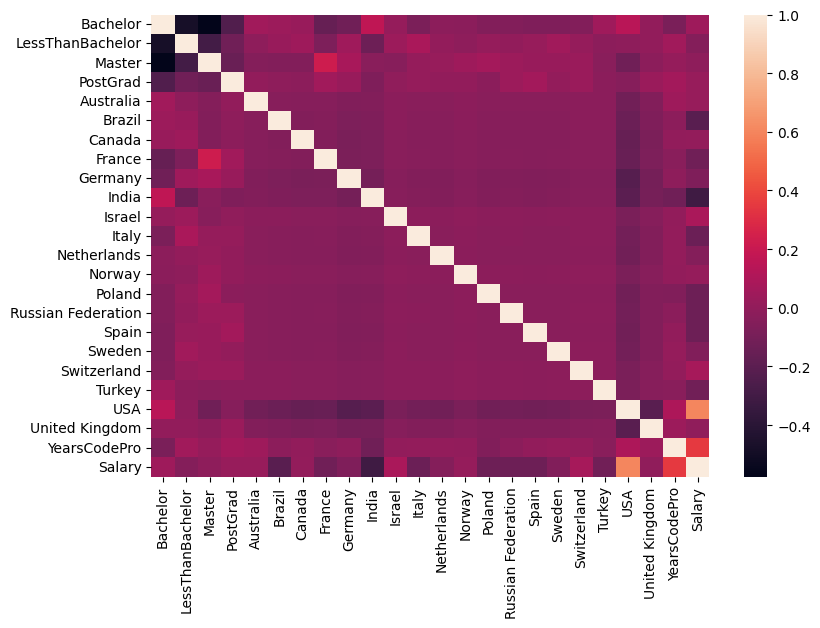

#### COLUMN CORRELATIONS AGAINST SALARIES ####
Bachelor              0.044882
LessThanBachelor     -0.051838
Master               -0.015085
PostGrad              0.021090
Australia             0.021316
Brazil               -0.208763
Canada                0.008739
France               -0.123342
Germany              -0.069303
India                -0.315436
Israel                0.086299
Italy                -0.140597
Netherlands          -0.049947
Norway                0.013708
Poland               -0.136783
Russian Federation   -0.135182
Spain                -0.133264
Sweden               -0.063445
Switzerland           0.073046
Turkey               -0.115985
USA                   0.605722
United Kingdom       -0.005894
YearsCodePro          0.352294
Salary                1.000000
Name: Salary, dtype: float64


In [24]:
# The correlations of all presented columns
plt.figure(figsize=(9,6))
sns.heatmap(df_sub2.corr())
plt.show()
print("#### COLUMN CORRELATIONS AGAINST SALARIES ####")
print(df_sub2.corr()['Salary'])

### Type 3: Use Most Negatively and Positively Correlated Columns Only (>=0.1 & <=-0.1)

In [25]:
# Use 80% of the dataset as training, and 20% as testing
# X = df_sub2.drop(columns='Salary', axis=1)
X = df_sub2[['Brazil','France','India','Italy','Poland','Russian Federation','Spain','Turkey','USA','YearsCodePro']]
Y = df_sub2.iloc[:,-1]
x_train, x_test, y_train, y_test = train_test_split(X, Y, test_size=0.2, random_state=21)
print("TRAIN SIZE:", x_train.shape, y_train.shape, "  TEST SIZE:", x_test.shape, y_test.shape)
print(X.columns)

TRAIN SIZE: (20464, 10) (20464,)   TEST SIZE: (5116, 10) (5116,)
Index(['Brazil', 'France', 'India', 'Italy', 'Poland', 'Russian Federation',
       'Spain', 'Turkey', 'USA', 'YearsCodePro'],
      dtype='object')


In [26]:
# Create lists to store results of error values of all regression methods
res_mse, res_rmse, res_mae, res_r2, res_cv_train, res_cv_test = [], [], [], [], [], []

# ML Regression Models

## 1 - Linear Regression

In [27]:
linreg = LinearRegression()
linreg.get_params()

{'copy_X': True,
 'fit_intercept': True,
 'n_jobs': None,
 'normalize': 'deprecated',
 'positive': False}

In [28]:
# Fit the training data into the linear reg. model, then make predictions on the test data
s_time = time.time()
linreg.fit(x_train, y_train)
y_pred = linreg.predict(x_test)
print(">>> Fitting and prediction were completed in {:.3f} seconds.".format(time.time()-s_time))

>>> Fitting and prediction were completed in 0.017 seconds.


In [29]:
print("COEF:", linreg.coef_)   # Estimated coefficients for the linear reg.
print("RANK:", linreg.rank_)   # Rank of matrix
print("INTERCEPT:", linreg.intercept_)   # Independent term in the linear model

COEF: [-40452.6993992  -20449.26977762 -39417.6807851  -36829.37761533
 -30240.64974492 -33242.78206049 -30928.81766926 -36430.12732384
  42291.81042045   1502.17684656]
RANK: 10
INTERCEPT: 59919.981100590434


In [30]:
# Compare the predicted values against the actual ones for the first 20 rows of the test set
for i in range(20):
    print("{:20} | {:8}".format(y_pred[i], y_test.iloc[i]))

   70435.21902652882 |  69482.0
    74941.7495662167 | 108098.0
  114229.20629354563 | 189000.0
  109722.67575385777 | 115000.0
   71937.39587309145 |  47412.0
   123242.2673729214 | 200000.0
   89963.51803184296 |  84019.0
  100478.75595778135 |  80172.0
   40221.79974625465 |  37834.0
    33605.8414112035 |  43239.0
   85456.98749215508 | 148648.0
   106718.3220607325 | 150000.0
  124744.44421948402 | 183000.0
  48483.772402349096 |  64859.0
   67430.86533340356 |  70264.0
  126246.62106604665 | 150000.0
  112496.17073028238 |  66810.0
   34005.09170268428 |  45360.0
   67430.86533340356 |  84000.0
   45479.41870922384 |  38916.0


In [31]:
# Results of metrics
mse, rmse, mae, r2 = mean_squared_error(y_test, y_pred), mean_squared_error(y_test, y_pred, squared=False), \
    mean_absolute_error(y_test, y_pred), r2_score(y_test, y_pred)
print("MSE:", mse)         # Mean squared error
print("RMSE:", rmse)       # Root mean squared error
print("MAE:", mae)         # Mean absolute error
print("R2 SCORE:", r2)     # R2 score
res_mse.append(mse)
res_rmse.append(rmse)
res_mae.append(mae)
res_r2.append(r2)
print("\n# CROSS VALIDATION #")
cross_val = cross_validate(linreg, X, Y, cv=5, return_train_score=True)    # 5-fold Cross Validation
print("FITTING TIME:", cross_val['fit_time'], "->", cross_val['fit_time'].mean())
print("SCORING TIME:", cross_val['score_time'], "->", cross_val['score_time'].mean())
print("TRAIN SCORE:", cross_val['train_score'], "->", cross_val['train_score'].mean())
res_cv_train.append(cross_val['train_score'].mean())
print("TEST SCORE:", cross_val['test_score'], "->", cross_val['test_score'].mean())
res_cv_test.append(cross_val['test_score'].mean())

MSE: 920152060.0153211
RMSE: 30334.008307761127
MAE: 22561.421257569844
R2 SCORE: 0.5487453018610217

# CROSS VALIDATION #
FITTING TIME: [0.01737285 0.00998592 0.0090003  0.00865388 0.00774431] -> 0.01055145263671875
SCORING TIME: [0.         0.00100541 0.00102711 0.00200796 0.        ] -> 0.000808095932006836
TRAIN SCORE: [0.56786141 0.55202329 0.55653411 0.54981219 0.55165977] -> 0.5555781529233691
TEST SCORE: [0.50615739 0.56540967 0.54813539 0.55975956 0.57128258] -> 0.5501489185575098


## 2 - Lasso Regression

In [32]:
lasso = Lasso()
lasso.get_params()

{'alpha': 1.0,
 'copy_X': True,
 'fit_intercept': True,
 'max_iter': 1000,
 'normalize': 'deprecated',
 'positive': False,
 'precompute': False,
 'random_state': None,
 'selection': 'cyclic',
 'tol': 0.0001,
 'warm_start': False}

In [33]:
# Fit the training data into the lasso model, then make predictions on the test data
s_time = time.time()
lasso.fit(x_train, y_train)
y_pred = lasso.predict(x_test)
print(">>> Fitting and prediction were completed in {:.3f} seconds.".format(time.time()-s_time))

>>> Fitting and prediction were completed in 0.019 seconds.


In [34]:
print("COEF:", lasso.coef_)   # Parameter vector (w in the cost function function formula)
print("INTERCEPT:", lasso.intercept_)   # Independent term in decision function
# Number of iterations run by the coord. descent solver to reach the specified tolerance
print("ITERATIONS:", lasso.n_iter_)  

COEF: [-40412.8208834  -20412.75640343 -39388.26666093 -36776.10251409
 -30189.07120376 -33186.96188809 -30879.38714984 -36346.41975617
  42306.07098586   1502.38548612]
INTERCEPT: 59900.217606649705
ITERATIONS: 9


In [35]:
# Compare the predicted values against the actual ones for the first 20 rows of the test set
for i in range(20):
    print("{:20} | {:8}".format(y_pred[i], y_test.iloc[i]))

   70416.91600949033 |  69482.0
   74924.07246785061 | 108098.0
  114225.37248147276 | 189000.0
   109718.2160231125 | 115000.0
   71919.30149561042 |  47412.0
  123239.68539819331 | 200000.0
    89947.9273290515 |  84019.0
  100464.62573189213 |  80172.0
  40238.653946280676 |  37834.0
   33640.81349540205 |  43239.0
   85440.77087069122 | 148648.0
  106713.44505087231 | 150000.0
  124742.07088431339 | 183000.0
   48501.77411994117 |  64859.0
   67412.14503725016 |  70264.0
  126244.45637043347 | 150000.0
  112483.70962085284 |  66810.0
   34070.49625331602 |  45360.0
   67412.14503725016 |  84000.0
   45497.00314770099 |  38916.0


In [36]:
# Results of metrics
mse, rmse, mae, r2 = mean_squared_error(y_test, y_pred), mean_squared_error(y_test, y_pred, squared=False), \
    mean_absolute_error(y_test, y_pred), r2_score(y_test, y_pred)
print("MSE:", mse)          
print("RMSE:", rmse)       
print("MAE:", mae)        
print("R2 SCORE:", r2)
res_mse.append(mse)
res_rmse.append(rmse)
res_mae.append(mae)
res_r2.append(r2)
print("\n# CROSS VALIDATION #")
cross_val = cross_validate(lasso, X, Y, cv=5, return_train_score=True)
print("FITTING TIME:", cross_val['fit_time'], "->", cross_val['fit_time'].mean())
print("SCORING TIME:", cross_val['score_time'], "->", cross_val['score_time'].mean())
print("TRAIN SCORE:", cross_val['train_score'], "->", cross_val['train_score'].mean())
res_cv_train.append(cross_val['train_score'].mean())
print("TEST SCORE:", cross_val['test_score'], "->", cross_val['test_score'].mean())
res_cv_test.append(cross_val['test_score'].mean())

MSE: 920144964.5743607
RMSE: 30333.891352320108
MAE: 22561.673454344498
R2 SCORE: 0.5487487815587888

# CROSS VALIDATION #
FITTING TIME: [0.03480935 0.0208683  0.01804018 0.03126383 0.01301336] -> 0.023599004745483397
SCORING TIME: [0.00150275 0.00153375 0.         0.0015552  0.        ] -> 0.0009183406829833985
TRAIN SCORE: [0.56786122 0.5520231  0.55653392 0.54981201 0.55165959] -> 0.5555779686113056
TEST SCORE: [0.50615416 0.5654125  0.54813282 0.55974376 0.57129832] -> 0.5501483109173395


## 3 - Ridge Regression

In [37]:
ridge = Ridge()
ridge.get_params()

{'alpha': 1.0,
 'copy_X': True,
 'fit_intercept': True,
 'max_iter': None,
 'normalize': 'deprecated',
 'positive': False,
 'random_state': None,
 'solver': 'auto',
 'tol': 0.001}

In [38]:
# Fit the training data into the ridge model, then make predictions on the test data
s_time = time.time()
ridge.fit(x_train, y_train)
y_pred = ridge.predict(x_test)
print(">>> Fitting and prediction were completed in {:.3f} seconds.".format(time.time()-s_time))

>>> Fitting and prediction were completed in 0.003 seconds.


In [39]:
print("COEF:", ridge.coef_)   # Weight vector(s)
print("INTERCEPT:", ridge.intercept_)   # Independent term in decision function
print("ITERATIONS:", ridge.n_iter_)   # Actual number of iterations for each target. (Only for 'sag' & 'lsqr' solvers)

COEF: [-40378.63699827 -20400.95832622 -39365.5270739  -36736.10154633
 -30161.23520003 -33151.77662563 -30851.93153407 -36283.94039007
  42313.22945301   1502.56396445]
INTERCEPT: 59887.62288363499
ITERATIONS: None


In [40]:
# Compare the predicted values against the actual ones for the first 20 rows of the test set
for i in range(20):
    print("{:20} | {:8}".format(y_pred[i], y_test.iloc[i]))

   70405.57063477953 |  69482.0
    74913.2625281272 | 108098.0
  114221.36405224194 | 189000.0
  109713.67215889427 | 115000.0
   71908.13459922875 |  47412.0
  123236.74783893727 | 200000.0
   89938.90217261942 |  84019.0
  100456.84992376395 |  80172.0
  40237.946539634795 |  37834.0
   33669.46908845278 |  43239.0
   85431.21027927175 | 148648.0
  106708.54422999584 | 150000.0
  124739.31180338649 | 183000.0
   48502.04834410551 |  64859.0
    67400.4427058811 |  70264.0
   126241.8757678357 | 150000.0
  112477.36163935772 |  66810.0
  34121.630244710934 |  45360.0
    67400.4427058811 |  84000.0
  45496.920415207074 |  38916.0


In [41]:
# Results of metrics
mse, rmse, mae, r2 = mean_squared_error(y_test, y_pred), mean_squared_error(y_test, y_pred, squared=False), \
    mean_absolute_error(y_test, y_pred), r2_score(y_test, y_pred)
print("MSE:", mse)        
print("RMSE:", rmse)      
print("MAE:", mae)        
print("R2 SCORE:", r2)  
res_mse.append(mse)
res_rmse.append(rmse)
res_mae.append(mae)
res_r2.append(r2)
print("\n# CROSS VALIDATION #")
cross_val = cross_validate(ridge, X, Y, cv=5, return_train_score=True)
print("FITTING TIME:", cross_val['fit_time'], "->", cross_val['fit_time'].mean())
print("SCORING TIME:", cross_val['score_time'], "->", cross_val['score_time'].mean())
print("TRAIN SCORE:", cross_val['train_score'], "->", cross_val['train_score'].mean())
res_cv_train.append(cross_val['train_score'].mean())
print("TEST SCORE:", cross_val['test_score'], "->", cross_val['test_score'].mean())
res_cv_test.append(cross_val['test_score'].mean())

MSE: 920146541.6932448
RMSE: 30333.917348295865
MAE: 22562.120725699853
R2 SCORE: 0.5487480081189011

# CROSS VALIDATION #
FITTING TIME: [0.01750135 0.         0.00500202 0.00401735 0.00512218] -> 0.006328582763671875
SCORING TIME: [0.         0.         0.00197458 0.00254846 0.00101089] -> 0.0011067867279052734
TRAIN SCORE: [0.56786089 0.55202276 0.55653359 0.5498117  0.55165925] -> 0.5555776387532895
TEST SCORE: [0.50615307 0.5654126  0.54812929 0.5597346  0.57131051] -> 0.5501480124744662


## 4 - Polynomial Regression

In [42]:
poly_feat = PolynomialFeatures(degree=2)
poly_feat.get_params()

{'degree': 2, 'include_bias': True, 'interaction_only': False, 'order': 'C'}

In [43]:
# Fit then transform for both training and test data (the number of columns must increase)
x_poly_train = poly_feat.fit_transform(x_train)
x_poly_test = poly_feat.fit_transform(x_test)
print(x_poly_train.shape, x_poly_test.shape)

(20464, 66) (5116, 66)


### Polynomial Regression with Lasso

In [44]:
lasso = Lasso()
s_time = time.time()
lasso.fit(x_poly_train, y_train)
y_poly_pred = lasso.predict(x_poly_test)
print(">>> Fitting and prediction were completed in {:.3f} seconds.".format(time.time()-s_time))

>>> Fitting and prediction were completed in 5.901 seconds.


In [45]:
print("COEF:", lasso.coef_)   # Parameter vector (w in the cost function function formula)
print("INTERCEPT:", lasso.intercept_)   # Independent term in decision function
# Number of iterations run by the coord. descent solver to reach the specified tolerance
print("ITERATIONS:", lasso.n_iter_) 

COEF: [ 0.00000000e+00 -3.47654957e+04 -1.75051581e+04 -3.40996859e+04
 -2.87114127e+04 -2.49430671e+04 -2.52635160e+04 -2.18773439e+04
 -2.61550373e+04  3.99448803e+04  3.94607437e+03 -1.47115604e+02
  0.00000000e+00  0.00000000e+00  0.00000000e+00  0.00000000e+00
  0.00000000e+00  0.00000000e+00  0.00000000e+00  0.00000000e+00
 -6.99413706e+02 -1.64674945e+02  0.00000000e+00  0.00000000e+00
  0.00000000e+00  0.00000000e+00  0.00000000e+00  0.00000000e+00
  0.00000000e+00 -2.74358741e+02 -2.04880727e+02  0.00000000e+00
  0.00000000e+00  0.00000000e+00  0.00000000e+00  0.00000000e+00
  0.00000000e+00 -7.54297048e+02 -2.33641686e+03  0.00000000e+00
  0.00000000e+00  0.00000000e+00  0.00000000e+00  0.00000000e+00
 -5.65069448e+02 -2.44059471e+03  0.00000000e+00  0.00000000e+00
  0.00000000e+00  0.00000000e+00 -3.12425816e+02 -3.12506779e+03
  0.00000000e+00  0.00000000e+00  0.00000000e+00 -6.55952227e+02
 -3.46188762e+03  0.00000000e+00  0.00000000e+00 -6.01231051e+02
 -3.88065536e+03  0

In [46]:
# Results of metrics
mse, rmse, mae, r2 = mean_squared_error(y_test, y_poly_pred), mean_squared_error(y_test, y_poly_pred, squared=False), \
    mean_absolute_error(y_test, y_poly_pred), r2_score(y_test, y_poly_pred)
print("MSE:", mse)          
print("RMSE:", rmse)     
print("MAE:", mae)         
print("R2 SCORE:", r2)    
res_mse.append(mse)
res_rmse.append(rmse)
res_mae.append(mae)
res_r2.append(r2)
print("\n# CROSS VALIDATION #")
cross_val = cross_validate(lasso, X, Y, cv=5, return_train_score=True)
print("FITTING TIME:", cross_val['fit_time'], "->", cross_val['fit_time'].mean())
print("SCORING TIME:", cross_val['score_time'], "->", cross_val['score_time'].mean())
print("TRAIN SCORE:", cross_val['train_score'], "->", cross_val['train_score'].mean())
res_cv_train.append(cross_val['train_score'].mean())
print("TEST SCORE:", cross_val['test_score'], "->", cross_val['test_score'].mean())
res_cv_test.append(cross_val['test_score'].mean())

MSE: 866201289.6301023
RMSE: 29431.29779044924
MAE: 21850.985682904506
R2 SCORE: 0.5752034707468707

# CROSS VALIDATION #
FITTING TIME: [0.03562236 0.01799917 0.03151798 0.01563287 0.0156045 ] -> 0.023275375366210938
SCORING TIME: [0.00202537 0.         0.         0.         0.        ] -> 0.0004050731658935547
TRAIN SCORE: [0.56786122 0.5520231  0.55653392 0.54981201 0.55165959] -> 0.5555779686113056
TEST SCORE: [0.50615416 0.5654125  0.54813282 0.55974376 0.57129832] -> 0.5501483109173395


### Polynomial Regression with Ridge

In [47]:
ridge = Ridge()
s_time = time.time()
ridge.fit(x_poly_train, y_train)
y_poly_pred = ridge.predict(x_poly_test)
print(">>> Fitting and prediction were completed in {:.3f} seconds.".format(time.time()-s_time))

>>> Fitting and prediction were completed in 0.019 seconds.


In [48]:
print("COEF:", ridge.coef_)   # Weight vector(s)
print("INTERCEPT:", ridge.intercept_)   # Independent term in decision function
print("ITERATIONS:", ridge.n_iter_)   # Actual number of iterations for each target. (Only for 'sag' & 'lsqr' solvers)

COEF: [     0.         -17470.67069524  -8858.36974305 -17165.44286175
 -15543.65074427 -13714.10496648 -14218.70029106 -12694.35891366
 -15046.1300291   19946.53313652   3944.08457388 -17470.67069524
      0.              0.              0.              0.
      0.              0.              0.              0.
   -697.58142097  -8858.36974305      0.              0.
      0.              0.              0.              0.
      0.           -271.27322606 -17165.44286176      0.
      0.              0.              0.              0.
      0.           -752.4965113  -15543.65074427      0.
      0.              0.              0.              0.
   -562.67140854 -13714.10496648      0.              0.
      0.              0.           -309.25539681 -14218.70029106
      0.              0.              0.           -652.61411795
 -12694.35891367      0.              0.           -598.09336062
 -15046.13002919      0.           -851.68023253  19946.53313655
    337.99982036    -81.89

In [49]:
# Results of metrics
mse, rmse, mae, r2 = mean_squared_error(y_test, y_poly_pred), mean_squared_error(y_test, y_poly_pred, squared=False), \
    mean_absolute_error(y_test, y_poly_pred), r2_score(y_test, y_poly_pred)
print("MSE:", mse)        
print("RMSE:", rmse)       
print("MAE:", mae)          
print("R2 SCORE:", r2)      
res_mse.append(mse)
res_rmse.append(rmse)
res_mae.append(mae)
res_r2.append(r2)
print("\n# CROSS VALIDATION #")
cross_val = cross_validate(ridge, X, Y, cv=5, return_train_score=True)
print("FITTING TIME:", cross_val['fit_time'], "->", cross_val['fit_time'].mean())
print("SCORING TIME:", cross_val['score_time'], "->", cross_val['score_time'].mean())
print("TRAIN SCORE:", cross_val['train_score'], "->", cross_val['train_score'].mean())
res_cv_train.append(cross_val['train_score'].mean())
print("TEST SCORE:", cross_val['test_score'], "->", cross_val['test_score'].mean())
res_cv_test.append(cross_val['test_score'].mean())

MSE: 866198355.0976197
RMSE: 29431.247936464053
MAE: 21851.13182305925
R2 SCORE: 0.5752049098802783

# CROSS VALIDATION #
FITTING TIME: [0.00605464 0.01317644 0.00499868 0.00529647 0.00499964] -> 0.006905174255371094
SCORING TIME: [0.         0.00203514 0.00101089 0.00099659 0.0010035 ] -> 0.001009225845336914
TRAIN SCORE: [0.56786089 0.55202276 0.55653359 0.5498117  0.55165925] -> 0.5555776387532895
TEST SCORE: [0.50615307 0.5654126  0.54812929 0.5597346  0.57131051] -> 0.5501480124744662


## 5 - Decision Tree Regression

In [50]:
# dtree = DecisionTreeRegressor(criterion='absolute_error', splitter='random', max_depth=None, min_samples_split=2,
#                              min_samples_leaf=1, min_weight_fraction_leaf=0.0, max_features='log2', max_leaf_nodes=10,
#                              min_impurity_decrease=0.2, ccp_alpha=0.0)
dtree = DecisionTreeRegressor()
dtree.get_params()

{'ccp_alpha': 0.0,
 'criterion': 'squared_error',
 'max_depth': None,
 'max_features': None,
 'max_leaf_nodes': None,
 'min_impurity_decrease': 0.0,
 'min_samples_leaf': 1,
 'min_samples_split': 2,
 'min_weight_fraction_leaf': 0.0,
 'random_state': None,
 'splitter': 'best'}

In [51]:
# Fit the training data into the decision tree, then make predictions on the test data
s_time = time.time()
dtree.fit(x_train, y_train)
y_pred = dtree.predict(x_test)
print(">>> Fitting and prediction were completed in {:.3f} seconds.".format(time.time()-s_time))

>>> Fitting and prediction were completed in 0.019 seconds.


In [52]:
# Compare the predicted values against the actual ones for the first 20 rows of the test set
for i in range(20):
    print("{:20} | {:8}".format(y_pred[i], y_test.iloc[i]))

   75465.47540983607 |  69482.0
   82536.17757009345 | 108098.0
  127561.74267100978 | 189000.0
  109431.12256809339 | 115000.0
   78658.56488549618 |  47412.0
  130809.15573770492 | 200000.0
   90755.37313432836 |  84019.0
            92106.72 |  80172.0
   30466.47619047619 |  37834.0
            38177.68 |  43239.0
           90501.248 | 148648.0
   98688.90532544379 | 150000.0
   133493.6754385965 | 183000.0
   51765.74324324324 |  64859.0
   69607.51834862385 |  70264.0
  139060.65789473685 | 150000.0
          94181.5625 |  66810.0
          44325.1875 |  45360.0
   69607.51834862385 |  84000.0
            45259.51 |  38916.0


In [53]:
# Results of metrics
mse, rmse, mae, r2 = mean_squared_error(y_test, y_pred), mean_squared_error(y_test, y_pred, squared=False), \
    mean_absolute_error(y_test, y_pred), r2_score(y_test, y_pred)
print("MSE:", mse)        
print("RMSE:", rmse)      
print("MAE:", mae)        
print("R2 SCORE:", r2)  
res_mse.append(mse)
res_rmse.append(rmse)
res_mae.append(mae)
res_r2.append(r2)
print("\n# CROSS VALIDATION #")
cross_val = cross_validate(dtree, X, Y, cv=5, return_train_score=True)
print("FITTING TIME:", cross_val['fit_time'], "->", cross_val['fit_time'].mean())
print("SCORING TIME:", cross_val['score_time'], "->", cross_val['score_time'].mean())
print("TRAIN SCORE:", cross_val['train_score'], "->", cross_val['train_score'].mean())
res_cv_train.append(cross_val['train_score'].mean())
print("TEST SCORE:", cross_val['test_score'], "->", cross_val['test_score'].mean())
res_cv_test.append(cross_val['test_score'].mean())

MSE: 857361146.8741076
RMSE: 29280.72995801347
MAE: 21784.39763329846
R2 SCORE: 0.579538793270406

# CROSS VALIDATION #
FITTING TIME: [0.01830292 0.01256037 0.01468301 0.01168394 0.00909019] -> 0.013264083862304687
SCORING TIME: [0.         0.00200105 0.00300598 0.00099254 0.        ] -> 0.0011999130249023438
TRAIN SCORE: [0.60562108 0.58856809 0.59239618 0.58638608 0.58862461] -> 0.5923192082822012
TEST SCORE: [0.52681594 0.59095962 0.5752538  0.58771051 0.5960333 ] -> 0.5753546332368416


## 6 - Random Forest Regression

In [54]:
# rforest = RandomForestRegressor(n_estimators=100, criterion='friedman_mse', max_depth=20, min_samples_split=4, 
#                                 min_samples_leaf=4, min_weight_fraction_leaf=0.1, max_features=None, max_leaf_nodes=None,
#                                 bootstrap=True, warm_start=False, ccp_alpha=0.2, max_samples=None)
rforest = RandomForestRegressor()
rforest.get_params()

{'bootstrap': True,
 'ccp_alpha': 0.0,
 'criterion': 'squared_error',
 'max_depth': None,
 'max_features': 1.0,
 'max_leaf_nodes': None,
 'max_samples': None,
 'min_impurity_decrease': 0.0,
 'min_samples_leaf': 1,
 'min_samples_split': 2,
 'min_weight_fraction_leaf': 0.0,
 'n_estimators': 100,
 'n_jobs': None,
 'oob_score': False,
 'random_state': None,
 'verbose': 0,
 'warm_start': False}

In [55]:
# Fit the training data into the random forest, then make predictions on the test data
s_time = time.time()
rforest.fit(x_train, y_train)
y_pred = rforest.predict(x_test)
print(">>> Fitting and prediction were completed in {:.3f} seconds.".format(time.time()-s_time))

>>> Fitting and prediction were completed in 0.724 seconds.


In [56]:
# Compare the predicted values against the actual ones for the first 20 rows of the test set
for i in range(20):
    print("{:20} | {:8}".format(y_pred[i], y_test.iloc[i]))

    75454.8766891214 |  69482.0
    82721.4829277859 | 108098.0
   127604.2946140826 | 189000.0
  109368.17789377068 | 115000.0
   78955.88452481997 |  47412.0
  130779.08802586602 | 200000.0
   90795.25881284848 |  84019.0
   93194.84386675707 |  80172.0
  30299.547959072403 |  37834.0
   38195.93880632103 |  43239.0
   90705.89093837606 | 148648.0
   98656.75702576916 | 150000.0
  133510.62834326134 | 183000.0
   51678.19285384272 |  64859.0
   69600.82626680257 |  70264.0
  139005.75533010546 | 150000.0
   94408.10995634434 |  66810.0
   44406.70153782899 |  45360.0
   69600.82626680257 |  84000.0
   45249.70428738824 |  38916.0


In [57]:
# Results of metrics
mse, rmse, mae, r2 = mean_squared_error(y_test, y_pred), mean_squared_error(y_test, y_pred, squared=False), \
    mean_absolute_error(y_test, y_pred), r2_score(y_test, y_pred)
print("MSE:", mse)        
print("RMSE:", rmse)      
print("MAE:", mae)        
print("R2 SCORE:", r2)  
res_mse.append(mse)
res_rmse.append(rmse)
res_mae.append(mae)
res_r2.append(r2)
print("\n# CROSS VALIDATION #")
cross_val = cross_validate(rforest, X, Y, cv=5, return_train_score=True)
print("FITTING TIME:", cross_val['fit_time'], "->", cross_val['fit_time'].mean())
print("SCORING TIME:", cross_val['score_time'], "->", cross_val['score_time'].mean())
print("TRAIN SCORE:", cross_val['train_score'], "->", cross_val['train_score'].mean())
res_cv_train.append(cross_val['train_score'].mean())
print("TEST SCORE:", cross_val['test_score'], "->", cross_val['test_score'].mean())
res_cv_test.append(cross_val['test_score'].mean())

MSE: 856702952.175988
RMSE: 29269.488416711145
MAE: 21779.65083580778
R2 SCORE: 0.5798615806255869

# CROSS VALIDATION #
FITTING TIME: [0.66206288 0.72668004 0.6997323  0.76187587 0.74571824] -> 0.7192138671875
SCORING TIME: [0.04693699 0.06484842 0.06654716 0.05245018 0.04983664] -> 0.056123876571655275
TRAIN SCORE: [0.6054119  0.58841779 0.59228291 0.58620171 0.58847208] -> 0.5921572781459558
TEST SCORE: [0.52850263 0.59143759 0.57589963 0.58812079 0.59692685] -> 0.5761774980554837


## 7 - KNN Regression

In [58]:
knnreg = KNeighborsRegressor()
knnreg.get_params()

{'algorithm': 'auto',
 'leaf_size': 30,
 'metric': 'minkowski',
 'metric_params': None,
 'n_jobs': None,
 'n_neighbors': 5,
 'p': 2,
 'weights': 'uniform'}

In [59]:
# Fit the training data into the KNN regression model, then make predictions on the test data
s_time = time.time()
knnreg.fit(x_train, y_train)
y_pred = knnreg.predict(x_test)
print(">>> Fitting and prediction were completed in {:.3f} seconds.".format(time.time()-s_time))

>>> Fitting and prediction were completed in 0.183 seconds.


In [60]:
# The distance metric to use. It will be the same as the 'metric' parameter or a synonym of it, e.g. 'euclidean' if the
# metric parameter set to 'minkowski' and 'p' parameter is set to 2.
print("EFFECTIVE METRIC:", knnreg.effective_metric_)
# Additional keyword arguments for the metric function. For most metrics will be same with 'metric_params' parameter,
# but may also contain the 'p' parameter value if the 'effective_metric_' attribute is set to 'miknowski'.
print("EFFECTIVE METRIC PARAMS:", knnreg.effective_metric_params_)
print("FEATURES:", knnreg.n_features_in_)  # Number of features seen during fit
print("FEATURE NAMES:", knnreg.feature_names_in_)  # Names of features seen during fit
print("SAMPLES FIT:", knnreg.n_samples_fit_)  # Number of samples in the fitted data

EFFECTIVE METRIC: euclidean
EFFECTIVE METRIC PARAMS: {}
FEATURES: 10
FEATURE NAMES: ['Brazil' 'France' 'India' 'Italy' 'Poland' 'Russian Federation' 'Spain'
 'Turkey' 'USA' 'YearsCodePro']
SAMPLES FIT: 20464


In [61]:
# Compare the predicted values against the actual ones for the first 20 rows of the test set
for i in range(20):
    print("{:20} | {:8}".format(y_pred[i], y_test.iloc[i]))

             65874.0 |  69482.0
             90044.0 | 108098.0
            128000.0 | 189000.0
             97000.0 | 115000.0
             60249.4 |  47412.0
            153620.0 | 200000.0
             84954.4 |  84019.0
             96127.8 |  80172.0
             29232.0 |  37834.0
             45411.8 |  43239.0
             91628.8 | 148648.0
             76955.2 | 150000.0
            147200.0 | 183000.0
             44838.8 |  64859.0
             75030.0 |  70264.0
            159000.0 | 150000.0
            107726.2 |  66810.0
             47927.2 |  45360.0
             75030.0 |  84000.0
             42460.2 |  38916.0


In [62]:
# Results of metrics
mse, rmse, mae, r2 = mean_squared_error(y_test, y_pred), mean_squared_error(y_test, y_pred, squared=False), \
    mean_absolute_error(y_test, y_pred), r2_score(y_test, y_pred)
print("MSE:", mse)        
print("RMSE:", rmse)      
print("MAE:", mae)        
print("R2 SCORE:", r2)  
res_mse.append(mse)
res_rmse.append(rmse)
res_mae.append(mae)
res_r2.append(r2)
print("\n# CROSS VALIDATION #")
cross_val = cross_validate(knnreg, X, Y, cv=5, return_train_score=True)
print("FITTING TIME:", cross_val['fit_time'], "->", cross_val['fit_time'].mean())
print("SCORING TIME:", cross_val['score_time'], "->", cross_val['score_time'].mean())
print("TRAIN SCORE:", cross_val['train_score'], "->", cross_val['train_score'].mean())
res_cv_train.append(cross_val['train_score'].mean())
print("TEST SCORE:", cross_val['test_score'], "->", cross_val['test_score'].mean())
res_cv_test.append(cross_val['test_score'].mean())

MSE: 1012732473.9804925
RMSE: 31823.4579199133
MAE: 23669.471657544957
R2 SCORE: 0.5033426466121279

# CROSS VALIDATION #
FITTING TIME: [0.03591204 0.03355217 0.03314257 0.03297567 0.0312798 ] -> 0.03337244987487793
SCORING TIME: [0.12001586 0.12666512 0.13402438 0.1289537  0.1099875 ] -> 0.1239293098449707
TRAIN SCORE: [0.51322494 0.48338989 0.5071364  0.50160558 0.48994761] -> 0.4990608858341673
TEST SCORE: [0.43315188 0.49206261 0.48627407 0.50744725 0.50013859] -> 0.4838148790243251


## 8 - Gradient Boosting

In [63]:
gradBoost = GradientBoostingRegressor()
gradBoost.get_params()

{'alpha': 0.9,
 'ccp_alpha': 0.0,
 'criterion': 'friedman_mse',
 'init': None,
 'learning_rate': 0.1,
 'loss': 'squared_error',
 'max_depth': 3,
 'max_features': None,
 'max_leaf_nodes': None,
 'min_impurity_decrease': 0.0,
 'min_samples_leaf': 1,
 'min_samples_split': 2,
 'min_weight_fraction_leaf': 0.0,
 'n_estimators': 100,
 'n_iter_no_change': None,
 'random_state': None,
 'subsample': 1.0,
 'tol': 0.0001,
 'validation_fraction': 0.1,
 'verbose': 0,
 'warm_start': False}

In [64]:
# Fit the training data into the Gradient boosting regression model, then make predictions on the test data
s_time = time.time()
gradBoost.fit(x_train, y_train)
y_pred = gradBoost.predict(x_test)
print(">>> Fitting and prediction were completed in {:.3f} seconds.".format(time.time()-s_time))

>>> Fitting and prediction were completed in 0.489 seconds.


In [65]:
print("INIT:", gradBoost.init_)  # The estimator that provides the initial predictions
print("ESTIMATORS (FIRST 5):\n{}".format(gradBoost.estimators_[:5]))  # The collection of fitted sub-estimators
# The number of estimators as selected by early stopping (if 'n_iter_no_change' is specified).
# Otherwise, it is set to 'n_estimators'
print("# OF ESTIMATORS:", gradBoost.n_estimators_)
print("# OF FEATURES:", gradBoost.n_features_in_)  # Number of features seen during fit
print("MAX FEATURES:", gradBoost.max_features_)  # The inferred value of max_features
print("FEATURE IMPORTANCES:", gradBoost.feature_importances_)  # The impurity-based feature importances
# The i'th score 'train_score[i]' is the loss of the model at iteration i on the in-bag sample.
# If subsample == 1, this is the loss on the training data.
print("TRAIN SCORE:\n{}".format(gradBoost.train_score_))

INIT: DummyRegressor()
ESTIMATORS (FIRST 5):
[[DecisionTreeRegressor(criterion='friedman_mse', max_depth=3,
                        random_state=RandomState(MT19937) at 0x26596695340)]
 [DecisionTreeRegressor(criterion='friedman_mse', max_depth=3,
                        random_state=RandomState(MT19937) at 0x26596695340)]
 [DecisionTreeRegressor(criterion='friedman_mse', max_depth=3,
                        random_state=RandomState(MT19937) at 0x26596695340)]
 [DecisionTreeRegressor(criterion='friedman_mse', max_depth=3,
                        random_state=RandomState(MT19937) at 0x26596695340)]
 [DecisionTreeRegressor(criterion='friedman_mse', max_depth=3,
                        random_state=RandomState(MT19937) at 0x26596695340)]]
# OF ESTIMATORS: 100
# OF FEATURES: 10
MAX FEATURES: 10
FEATURE IMPORTANCES: [0.03814502 0.00978444 0.06673513 0.01983306 0.01402273 0.01709395
 0.01590198 0.01175286 0.62110052 0.18563031]
TRAIN SCORE:
[1.86611191e+09 1.70940868e+09 1.58102486e+09 1.476

In [66]:
# Compare the predicted values against the actual ones for the first 20 rows of the test set
for i in range(20):
    print("{:20} | {:8}".format(y_pred[i], y_test.iloc[i]))

   72249.45944039762 |  69482.0
   79363.91186222412 | 108098.0
  127109.55750173524 | 189000.0
  110413.26948986422 | 115000.0
   75339.46174662319 |  47412.0
  131923.91568826605 | 200000.0
   87824.30142660855 |  84019.0
   87824.30142660855 |  80172.0
   33439.34290619538 |  37834.0
  38545.927712938406 |  43239.0
   87517.22554306373 | 148648.0
   99842.20324152247 | 150000.0
  133413.50480352415 | 183000.0
  53877.838466983034 |  64859.0
   66646.94552809684 |  70264.0
   138922.2309970959 | 150000.0
   87824.30142660855 |  66810.0
  43531.294885192256 |  45360.0
   66646.94552809684 |  84000.0
   46209.71408932168 |  38916.0


In [67]:
# Results of metrics
mse, rmse, mae, r2 = mean_squared_error(y_test, y_pred), mean_squared_error(y_test, y_pred, squared=False), \
    mean_absolute_error(y_test, y_pred), r2_score(y_test, y_pred)
print("MSE:", mse)        
print("RMSE:", rmse)      
print("MAE:", mae)        
print("R2 SCORE:", r2)  
res_mse.append(mse)
res_rmse.append(rmse)
res_mae.append(mae)
res_r2.append(r2)
print("\n# CROSS VALIDATION #")
cross_val = cross_validate(gradBoost, X, Y, cv=5, return_train_score=True)
print("FITTING TIME:", cross_val['fit_time'], "->", cross_val['fit_time'].mean())
print("SCORING TIME:", cross_val['score_time'], "->", cross_val['score_time'].mean())
print("TRAIN SCORE:", cross_val['train_score'], "->", cross_val['train_score'].mean())
res_cv_train.append(cross_val['train_score'].mean())
print("TEST SCORE:", cross_val['test_score'], "->", cross_val['test_score'].mean())
res_cv_test.append(cross_val['test_score'].mean())

MSE: 856871599.6483493
RMSE: 29272.369218229487
MAE: 21723.603733875505
R2 SCORE: 0.5797788736823117

# CROSS VALIDATION #
FITTING TIME: [0.44261813 0.44582438 0.45519185 0.49848199 0.47590566] -> 0.46360440254211427
SCORING TIME: [0.00750494 0.01563001 0.         0.         0.00906301] -> 0.006439590454101562
TRAIN SCORE: [0.59877071 0.58258971 0.58595031 0.57968081 0.58231928] -> 0.5858621618470903
TEST SCORE: [0.53042704 0.59353942 0.57838766 0.58768261 0.59705649] -> 0.5774186425601986


## 9 - XGBoost

In [68]:
xgb = xgboost.XGBRegressor()
xgb.get_params()

{'objective': 'reg:squarederror',
 'base_score': None,
 'booster': None,
 'callbacks': None,
 'colsample_bylevel': None,
 'colsample_bynode': None,
 'colsample_bytree': None,
 'device': None,
 'early_stopping_rounds': None,
 'enable_categorical': False,
 'eval_metric': None,
 'feature_types': None,
 'gamma': None,
 'grow_policy': None,
 'importance_type': None,
 'interaction_constraints': None,
 'learning_rate': None,
 'max_bin': None,
 'max_cat_threshold': None,
 'max_cat_to_onehot': None,
 'max_delta_step': None,
 'max_depth': None,
 'max_leaves': None,
 'min_child_weight': None,
 'missing': nan,
 'monotone_constraints': None,
 'multi_strategy': None,
 'n_estimators': None,
 'n_jobs': None,
 'num_parallel_tree': None,
 'random_state': None,
 'reg_alpha': None,
 'reg_lambda': None,
 'sampling_method': None,
 'scale_pos_weight': None,
 'subsample': None,
 'tree_method': None,
 'validate_parameters': None,
 'verbosity': None}

In [69]:
# Fit the training data into the extreme gradient boosting regression model, then make predictions on the test data
s_time = time.time()
xgb.fit(x_train, y_train)
y_pred = xgb.predict(x_test)
print(">>> Fitting and prediction were completed in {:.3f} seconds.".format(time.time()-s_time))

>>> Fitting and prediction were completed in 0.110 seconds.


In [70]:
# Compare the predicted values against the actual ones for the first 20 rows of the test set
for i in range(20):
    print("{:20} | {:8}".format(y_pred[i], y_test.iloc[i]))

       75263.4921875 |  69482.0
         82559.46875 | 108098.0
        127608.78125 | 189000.0
      109461.3515625 | 115000.0
       78523.4609375 |  47412.0
        130849.65625 | 200000.0
       90788.1328125 |  84019.0
        92506.984375 |  80172.0
     30280.837890625 |  37834.0
      38619.16015625 |  43239.0
       90615.0390625 | 148648.0
         98720.34375 | 150000.0
          133467.875 | 183000.0
      51630.21484375 |  64859.0
         69494.65625 |  70264.0
         138930.6875 | 150000.0
        94101.890625 |  66810.0
       43907.9609375 |  45360.0
         69494.65625 |  84000.0
       45154.9296875 |  38916.0


In [71]:
# Results of metrics
mse, rmse, mae, r2 = mean_squared_error(y_test, y_pred), mean_squared_error(y_test, y_pred, squared=False), \
    mean_absolute_error(y_test, y_pred), r2_score(y_test, y_pred)
print("MSE:", mse)        
print("RMSE:", rmse)      
print("MAE:", mae)        
print("R2 SCORE:", r2)  
res_mse.append(mse)
res_rmse.append(rmse)
res_mae.append(mae)
res_r2.append(r2)
print("\n# CROSS VALIDATION #")
cross_val = cross_validate(xgb, X, Y, cv=5, return_train_score=True)
print("FITTING TIME:", cross_val['fit_time'], "->", cross_val['fit_time'].mean())
print("SCORING TIME:", cross_val['score_time'], "->", cross_val['score_time'].mean())
print("TRAIN SCORE:", cross_val['train_score'], "->", cross_val['train_score'].mean())
res_cv_train.append(cross_val['train_score'].mean())
print("TEST SCORE:", cross_val['test_score'], "->", cross_val['test_score'].mean())
res_cv_test.append(cross_val['test_score'].mean())

MSE: 856556421.6984386
RMSE: 29266.985182940156
MAE: 21766.693401369477
R2 SCORE: 0.5799334411030972

# CROSS VALIDATION #
FITTING TIME: [0.11009216 0.09990525 0.080127   0.09414887 0.07852817] -> 0.0925602912902832
SCORING TIME: [0.         0.         0.01562572 0.         0.        ] -> 0.0031251430511474608
TRAIN SCORE: [0.60557048 0.58852332 0.59235886 0.58634918 0.58859312] -> 0.5922789929914429
TEST SCORE: [0.52791843 0.59138429 0.57609512 0.58829798 0.5965769 ] -> 0.5760545446448673


## Results of Metrics of All ML Models Together

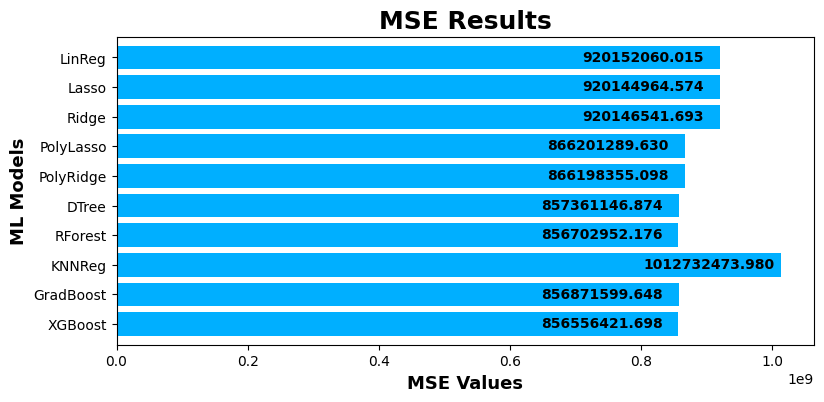

In [78]:
methods = ['LinReg', 'Lasso', 'Ridge', 'PolyLasso', 'PolyRidge', 'DTree', 'RForest', 'KNNReg', 'GradBoost', 'XGBoost']
plt.figure(figsize=(9,4))
plt.barh(range(10), res_mse, color='#00afff')
plt.title("MSE Results", fontsize=18, fontweight='bold')
plt.yticks(range(10), methods)
plt.ylim(9.7,-0.7)
plt.xlabel('MSE Values', fontsize=13, fontweight='bold')
plt.ylabel('ML Models', fontsize=13, fontweight='bold')
for i in range(10):
    plt.text(res_mse[i]-210000000, i+0.12, "{:.3f}".format(res_mse[i]), fontweight='bold')
plt.show()

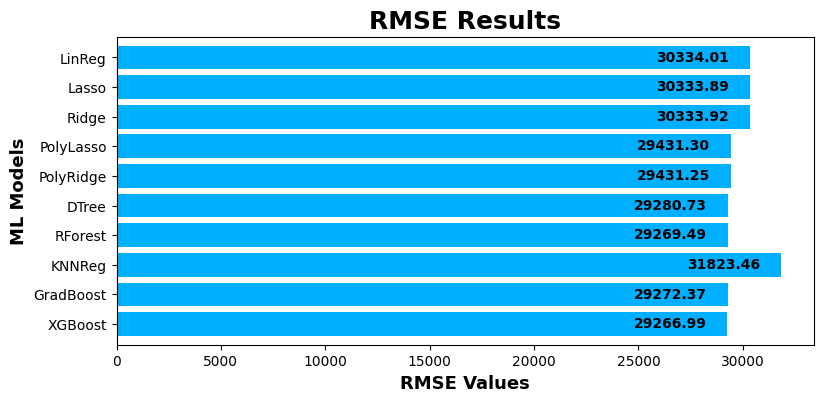

In [73]:
plt.figure(figsize=(9,4))
plt.barh(range(10), res_rmse, color='#00afff')
plt.title("RMSE Results", fontsize=18, fontweight='bold')
plt.yticks(range(10), methods)
plt.ylim(9.7,-0.7)
plt.xlabel('RMSE Values', fontsize=13, fontweight='bold')
plt.ylabel('ML Models', fontsize=13, fontweight='bold')
for i in range(10):
    plt.text(res_rmse[i]-4500, i+0.12, "{:.2f}".format(res_rmse[i]), fontweight='bold')
plt.show()

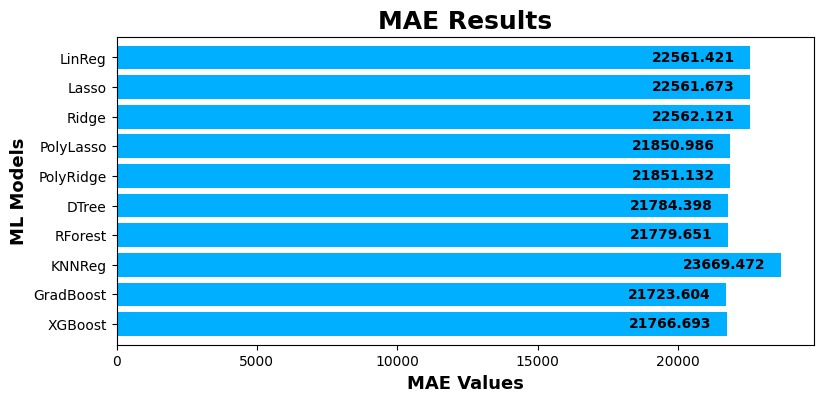

In [74]:
plt.figure(figsize=(9,4))
plt.barh(range(10), res_mae, color='#00afff')
plt.title("MAE Results", fontsize=18, fontweight='bold')
plt.yticks(range(10), methods)
plt.ylim(9.7,-0.7)
plt.xlabel('MAE Values', fontsize=13, fontweight='bold')
plt.ylabel('ML Models', fontsize=13, fontweight='bold')
for i in range(10):
    plt.text(res_mae[i]-3500, i+0.12, "{:.3f}".format(res_mae[i]), fontweight='bold')
plt.show()

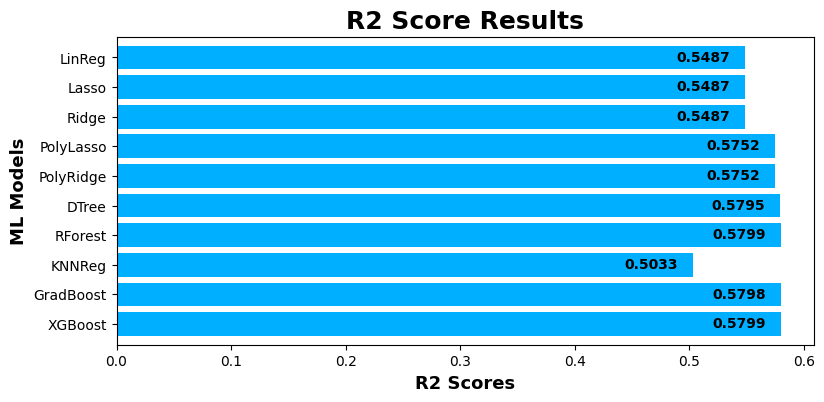

In [75]:
plt.figure(figsize=(9,4))
plt.barh(range(10), res_r2, color='#00afff')
plt.title("R2 Score Results", fontsize=18, fontweight='bold')
plt.yticks(range(10), methods)
plt.ylim(9.7,-0.7)
plt.xlabel('R2 Scores', fontsize=13, fontweight='bold')
plt.ylabel('ML Models', fontsize=13, fontweight='bold')
for i in range(10):
    plt.text(res_r2[i]-0.06, i+0.12, "{:.4f}".format(res_r2[i]), fontweight='bold')
plt.show()

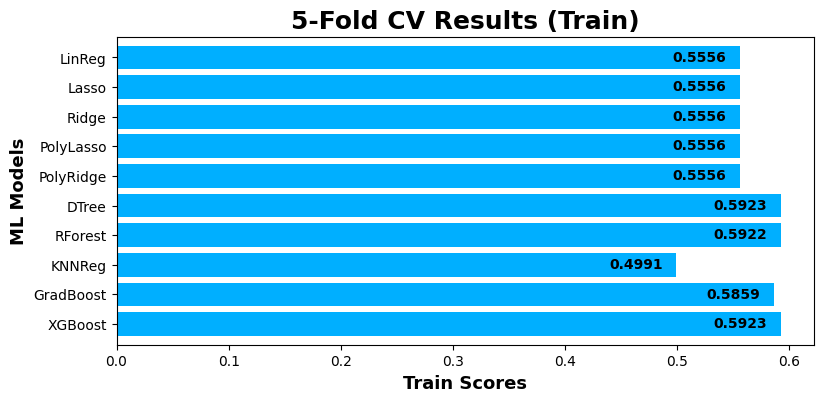

In [76]:
plt.figure(figsize=(9,4))
plt.barh(range(10), res_cv_train, color='#00afff')
plt.title("5-Fold CV Results (Train)", fontsize=18, fontweight='bold')
plt.yticks(range(10), methods)
plt.ylim(9.7,-0.7)
plt.xlabel('Train Scores', fontsize=13, fontweight='bold')
plt.ylabel('ML Models', fontsize=13, fontweight='bold')
for i in range(10):
    plt.text(res_cv_train[i]-0.06, i+0.12, "{:.4f}".format(res_cv_train[i]), fontweight='bold')
plt.show()

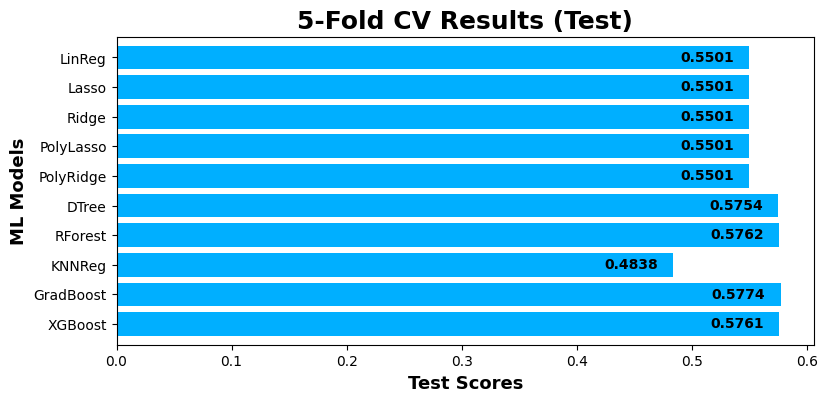

In [77]:
plt.figure(figsize=(9,4))
plt.barh(range(10), res_cv_test, color='#00afff')
plt.title("5-Fold CV Results (Test)", fontsize=18, fontweight='bold')
plt.yticks(range(10), methods)
plt.ylim(9.7,-0.7)
plt.xlabel('Test Scores', fontsize=13, fontweight='bold')
plt.ylabel('ML Models', fontsize=13, fontweight='bold')
for i in range(10):
    plt.text(res_cv_test[i]-0.06, i+0.12, "{:.4f}".format(res_cv_test[i]), fontweight='bold')
plt.show()